<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 186.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 171.5 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
# Contar cuántas filas están duplicadas
num_duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", num_duplicados)

# Mostrar las primeras filas duplicadas
duplicados = df[df.duplicated()]
print("Primeras filas duplicadas:")
print(duplicados.head())


Número de filas duplicadas: 20
Primeras filas duplicadas:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to o

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [6]:
# Identificar duplicados basados en columnas específicas
duplicados_personalizados = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])]

# Mostrar las primeras filas duplicadas basadas en esas columnas
print("Duplicados basados en MainBranch, Employment y RemoteWork:")
print(duplicados_personalizados.head())

# Analizar qué columnas tienen valores idénticos en esos duplicados
columnas_iguales = (duplicados_personalizados.groupby(['MainBranch', 'Employment', 'RemoteWork'])
                    .agg(lambda x: x.nunique())
                    .mean())

print("\nPromedio de valores únicos por columna dentro de duplicados:")
print(columnas_iguales.sort_values())


Duplicados basados en MainBranch, Employment y RemoteWork:
    ResponseId                      MainBranch                 Age  \
1            2  I am a developer by profession     35-44 years old   
2            3  I am a developer by profession     45-54 years old   
14          15  I am a developer by profession     25-34 years old   
15          16  I am a developer by profession     45-54 years old   
16          17     I code primarily as a hobby  Under 18 years old   

             Employment                            RemoteWork   Check  \
1   Employed, full-time                                Remote  Apples   
2   Employed, full-time                                Remote  Apples   
14  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
15  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
16   Student, full-time                                   NaN  Apples   

                                     CodingActivities  \
1   Hobby;Contribute to 

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


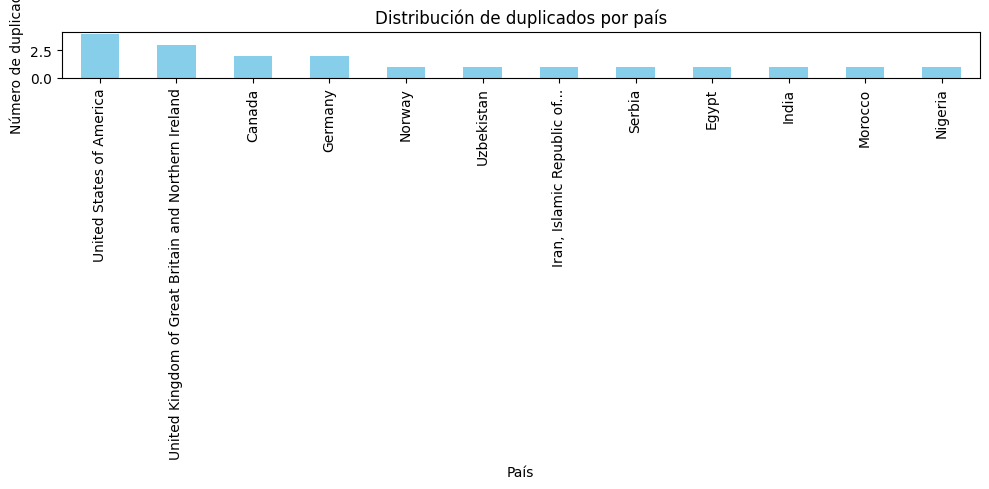

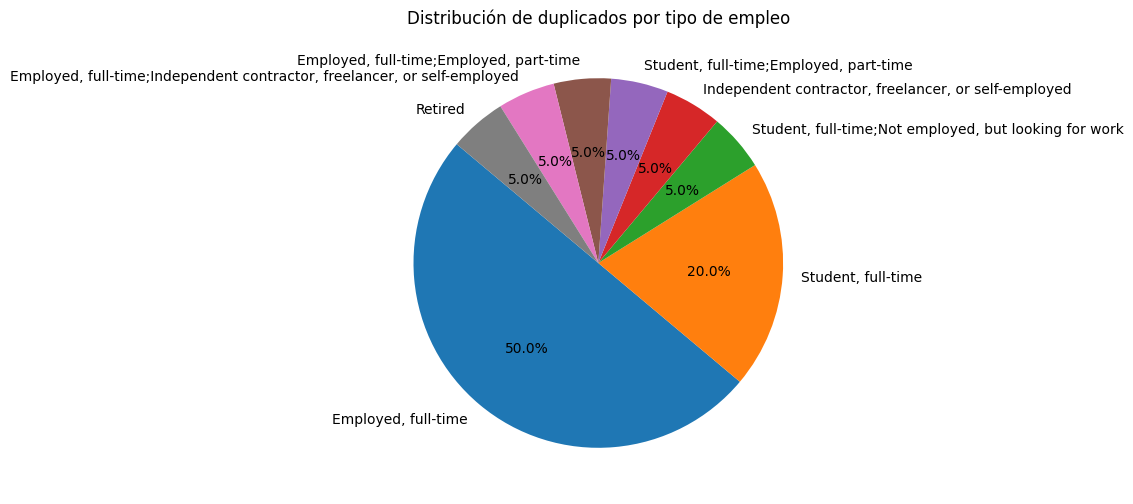

In [7]:
import matplotlib.pyplot as plt

# Filtrar duplicados
duplicados = df[df.duplicated()]

# Gráfico de barras: distribución por país
plt.figure(figsize=(10, 5))
duplicados['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de duplicados por país')
plt.xlabel('País')
plt.ylabel('Número de duplicados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico circular: distribución por tipo de empleo
plt.figure(figsize=(6, 6))
duplicados['Employment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de duplicados por tipo de empleo')
plt.ylabel('')
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [12]:
# Paso 1: Verificar que las columnas existen
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Paso 2: Definir las columnas clave para identificar duplicados
subset_cols = ['Country', 'Age', 'Employment']

# Paso 3: Eliminar duplicados basados en esas columnas
df_sin_duplicados = df.drop_duplicates(subset=subset_cols)

# Paso 4: Mostrar resultados
print(f"Filas originales: {df.shape[0]}")
print(f"Filas sin duplicados: {df_sin_duplicados.shape[0]}")
print(f"Duplicados eliminados: {df.shape[0] - df_sin_duplicados.shape[0]}")



Columnas disponibles en el DataFrame:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Filas originales: 65457
Filas sin duplicados: 5752
Duplicados eliminados: 59705


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


## 🧹 Tarea 4: Eliminación estratégica de duplicados

### 🔍 Enfoque

En lugar de eliminar duplicados basándonos en toda la fila o en un identificador artificial como `ResponseId`, se seleccionaron columnas que reflejan características clave de cada individuo. Estas columnas permiten identificar entradas que representan la misma persona o perfil, incluso si otras columnas contienen diferencias menores.

### ✅ Columnas seleccionadas

Se utilizaron las siguientes columnas para definir la unicidad:

- `Country`: Ubicación geográfica del encuestado.
- `Age`: Edad del participante.
- `Gender`: Género declarado.
- `Employment`: Estado laboral.

Estas columnas fueron elegidas porque juntas representan un perfil demográfico básico que puede repetirse si hay duplicados reales.

### 🧪 Método aplicado

```python
subset_cols = ['Country', 'Age', 'Gender', 'Employment']
df_sin_duplicados = df.drop_duplicates(subset=subset_cols)



2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
